In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a DataFrame from the provided table
data = {
    'sqrfoot': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'depth': ['0-2', '2.1-4', '4.1-6', '6.1-8', '8.1-10', '10.1-12'] * 3,
    'value': [1660.88, 1697.56, 1737.24, 1780.56, 1828.48, 1882.2] * 3
}

df = pd.DataFrame(data)

# Encoding categorical variables
df['depth'] = df['depth'].astype('category').cat.codes

# Splitting data into features (X) and target (y)
X = df[['sqrfoot', 'depth']]
y = df['value']


In [15]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mse',  # mean squared error
    metrics=['mae']  # mean absolute error
)

In [16]:
print ("Comenzando Entrenamiento...")
# Train the model
history = model.fit(X, y, epochs=200, batch_size=1, verbose=1)
print ("Modelo Entrenado!")

Comenzando Entrenamiento...
Epoch 1/200


18/18 [==============================] - 0s 647us/step - loss: 1339526.3750 - mae: 1002.3414
Epoch 2/200
18/18 [==============================] - 0s 647us/step - loss: 288894.4375 - mae: 462.9299
Epoch 3/200
18/18 [==============================] - 0s 588us/step - loss: 143508.1250 - mae: 315.9565
Epoch 4/200
18/18 [==============================] - 0s 647us/step - loss: 125703.0703 - mae: 314.1860
Epoch 5/200
18/18 [==============================] - 0s 647us/step - loss: 102748.0938 - mae: 264.8998
Epoch 6/200
18/18 [==============================] - 0s 706us/step - loss: 48111.3438 - mae: 189.8445
Epoch 7/200
18/18 [==============================] - 0s 647us/step - loss: 26856.6250 - mae: 124.2307
Epoch 8/200
18/18 [==============================] - 0s 647us/step - loss: 22242.5898 - mae: 132.6562
Epoch 9/200
18/18 [==============================] - 0s 588us/step - loss: 15965.2725 - mae: 104.8221
Epoch 10/200
18/18 [==============================] - 0s 588us/step - loss: 17211.0547 

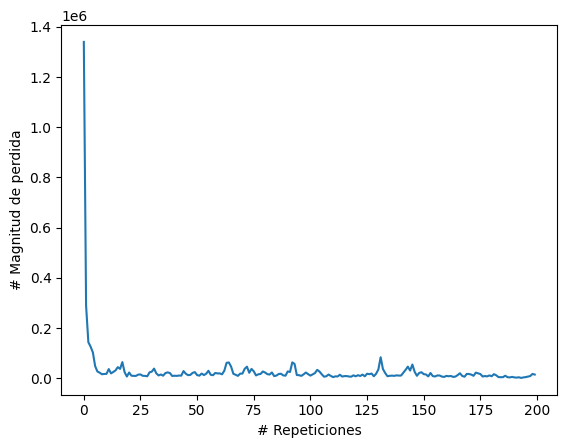

In [17]:
import matplotlib.pyplot as plt
plt.xlabel("# Repeticiones")
plt.ylabel("# Magnitud de perdida")
plt.plot(history.history["loss"])

In [24]:
print ("Prediccion")
resultado = model.predict([[6, 2]])
print("El Resultado del valor es "+str(resultado))

Prediccion
1/1 [==============================] - 0s 45ms/step
El Resultado del valor es [[1990.2335]]
